<a href="https://colab.research.google.com/github/Glifoyle/test-repo/blob/master/Proj2IMPROCUND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[PRACTICAL PROGRAMMING PROJECT 2: Image manipulation for Data Science](#scrollTo=bbSsJ2E18Xkt)

[Download Data](#scrollTo=LOaAKBUG8Xky)

[Level 1, Basic Image Manipulation](#scrollTo=wdH3jKef8Xk0)

>[Task 1, Load an image using OpenCV](#scrollTo=wdH3jKef8Xk0)

>[Task 2, Load Binary masks](#scrollTo=mJx3R23s8Xk2)

>[Simple Mask Manipulation](#scrollTo=zEhIJYZC8Xk2)

>[Task 3, Basic Mask Statistics](#scrollTo=zEhIJYZC8Xk2)

>[Large-Scale Image Data Manipulation](#scrollTo=lGQjipJS8Xk3)

>[Task 4, Create Label Image](#scrollTo=lGQjipJS8Xk3)

[LEVEL 2, Statistics on Annotations](#scrollTo=yAL20JWx8Xk3)

>[Task 5, Detect multiple annotation.](#scrollTo=yAL20JWx8Xk3)

>[Census-Type Statistics](#scrollTo=Y5ZCR55U8Xk4)

>[Task 6, Label Images to Pandas DataFrame](#scrollTo=Y5ZCR55U8Xk4)

>[Task 7 Clean up the DataFrame and Visualize Data](#scrollTo=YEHNqtbE8Xk7)

[Level 3: Using Library functions for Image manipulation, qualitative evaluation](#scrollTo=lie_F6UW8Xk7)

>[Task 8 Create Function to count trees.](#scrollTo=BBZldC4A8Xk8)

>[Task 9, Pandas DataFrame of trees per class](#scrollTo=z6KtK_uc8Xk9)

>[Task 10](#scrollTo=92vOWlZp8Xk9)

# PRACTICAL PROGRAMMING PROJECT 2: Image manipulation for Data Science
__________________________________________________________


In this notebook we are going to work with **image Data and with expert annotations**.

**Data science projects always happen in teams.** Our goal is to take advantage of **apply expert knowledge to large amounts of data.** To do this, we first collect information from the experts in our team in the shape of **annotations** and then we process it using modern computers.

We are going to see how to **perform simple statistics on annotations, and use functions in image processing libraries** such as OpenCV. These are still pretty simple programming tasks, but I hope that, by the end of this notebook, you will agree with me that, **even with relatively simple Python code we can extract a lot of detailed information from expert annotations**.

In [ ]:
# general imports
from matplotlib import pyplot as plt
import os
import timeit
import cv2
import numpy as np
import pandas as pd
from collections import defaultdict
import re

In [ ]:
# Integrate plots into notebook
%matplotlib inline

# Download Data

First, we will download the data to make sure we have it in our colab machine or our local computer using either [the "requests" library](https://requests.readthedocs.io/en/latest/) or the wget linux command.

In [ ]:
import urllib.request

# Check if we are in colab or not and choose the best option for every case
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False


if IN_COLAB:
  !wget 'https://www.dropbox.com/scl/fi/gu9rfe7czbsxwipbkihbe/Data_Sarah.zip?rlkey=gc9wbbg5k189mi07pjjzvhkl4&st=nnizw49z&dl=0'
  !mv "Data_Sarah.zip?rlkey=gc9wbbg5k189mi07pjjzvhkl4&st=nnizw49z&dl=0" Data_Sarah.zip
else:
    url = 'https://www.dropbox.com/scl/fi/gu9rfe7czbsxwipbkihbe/Data_Sarah.zip?rlkey=gc9wbbg5k189mi07pjjzvhkl4&st=nnizw49z&dl=0'
    filename = 'Data_Sarah.zip'
    urllib.request.urlretrieve(url, filename)

!unzip Data_Sarah.zip


This data corresponds to several sites of the Yamagata University Research Forest [YURF](https://www.tr.yamagata-u.ac.jp/~larry/YURF).

Let's also have a quick look at the subfolders in our main folder.

In [ ]:
dataFolder = "./Data_Sarah"

# Print files here
print( os.listdir(dataFolder))

The code very convenienlty shows us that there is one folder for every site and that within each folder there are quite a lot of files. Most of them, include binary masks indicating the position of the different species of trees in each site.

Let us see what files are in the folder of one of the sites:

In [ ]:
siteFolder = "./Data_Sarah/S5"

# Print files here
print( os.listdir(siteFolder))

Let us have a detailed look at this folder:  

- The first that we see is a file called `S5.jpg`. This file contains the mosaic (RGB image) of the site.  
- Then we have many files name `S5SXX.jpg`. These are the binary masks containing the annotations of the experts and XX is a code that stands for a tree species. There are many species of trees and not all of them are present in all sites. For example, site 5 contains a file named `S5S41.jpg` that means that species number 41 is in the site. But there is no file named `S5S03.jpg` so species "03" is not present in the site.  
- We have other files like a file that contain ROI in their name `S5ROI.jpg`, indicating the **Region Of Interest**. This means that parts outside of this region are not considered in the study.   
- Finally, we also have a file showing us the positions of tree tops called `S5treetopsROI.png`.

But just looking at file names is very boring, let us visualize everything:

# Level 1, Basic Image Manipulation

In a first approach, we will do some simple things with images to understand the annotions and how to visualize the images. We will:

- Load a couple of images.    
- Visualize their pixel types.  
- Plot them using the matplotlib library.

## Task 1, Load an image using OpenCV

We will start by loading image "S1.jpg" in folder S1. We will do so using the [Opencv](https://opencv.org/) image library:

- Check its pixel type and print it on the screen.
- Print also the image dimensions (width, height and total number of pixels).  
- After you have done that, visualize the image on the screen (using matplotlib is recommended).

**NOTES:**

- You can define the path to the image as "./S1/S1.jpg" or, if you want it to work in any OS, as os.path.join(dataFolder,"S1","S1.jpg").

In [ ]:
# Your solution

Now we know what our mosaics look like! Feel free to visualize others untill you are familiar with the data.

## Task 2, Load Binary masks

Let's now load a Binary image containing expert annotations and visualize it along with the mosaic:

- Read the binary file in folder "S1", file name: "S1S01.jpg".  
- Visualize it using matplolib.  
- Superimose it over the mosaic that you read in the previous task. Visualize them together.  
- Make a small subimage that shows part of the mosaic with the superimosed mask so you can see the details of the annotation. For example, you can use: xMin = 2500, xMax = 3100, yMin = 5660, yMax = 6450

In [ ]:
# your solution


## Simple Mask Manipulation

Now that we have loaded a mask image, **we have some expert knowledge stored in a way that we can process using Python** code. This is the main reason we do Data Science!

Python allows us to process expert-annotated Data very efficiently, but **we need to code our applications efficiently** or we may loose valuable time. Let's see a simple example. The previously loaded Mask contains the position of all the trees of one particular species. In particular, black pixels show the position of the trees that we want to study. Let's supose we want to calculate the total area of the species. As we know the real-world dimensions of the pixels in our image (usually around 4 square cms), all we need is to count how many pixels we have and multiply for those dimensions.

## Task 3, Basic Mask Statistics

**Let's count the black pixels** in the mask that we have just loaded:

- With a simple "for" loop using the image dimensions in the **shape** attribute.  
- Viewing our image as a [numpy array](https://numpy.org/) and using numpy functions (for example **sum**).

Write some python code for the three options, measure their running times (python [timeit](https://docs.python.org/3/library/timeit.html) is recommended) and compare them.

In [ ]:
# Your solution

## Large-Scale Image Data Manipulation

Now that we are familiar with the general format of the Data that we have (RGB images with binary masks), let's start processing it using what we already can do in Python.

For example, in our Data we have many different tree species annotated for our different sites. Each of these images is annotated in a single binary mask in a separate file. Let us combine this information in a single "label image".

## Task 4, Create Label Image

Build a Python function that:

- Receives a folder. The name of the last subfolder will correspond to the name of the site that the Data corresponds to. For example PATH/S11/ means that the data corresponds to site 11. We will call the number of the site **site_num**. In this case **site_num** would be 11.
- Reads a binary image named **Ssite_numROI.jpg**. This is the ROI image that tells us what part of the image contains interesting information.
- Reads all the binary images named **Ssite_numSsp_num.jpg.** Each of these images corresponds to the pixels in the  mosaic of the site that contain species number **sp_num**. Notice that **sp_num** has two digits, the first of which may be 0.  
- Creates one "label" image, named **Ssite_numGT.png**.
    - This image will have the same dimensions as the mosaic image.
    - Will contain 0's wherever the ROI **Ssite_numROI.jpg** is white.  
    - Will contain site_num for every pixel in the binary mask file of that species **Ssite_numSsp_num.jpg**.

- Once you have created the label image:
    - Call the function you have created to create the label image os subfolder "S1" in your data folder.
    - Read an RGB image named **Ssite_num.jpg**. This is the RGB mosaic of the site.  
    - Visualize the label image using OpenCV on its own and superimposed over the mosaic.
    
You can use the following function to check if a file contains a speceis mask.    

In [ ]:
def isSpeciesMask(file,sn):
    """
        Function that uses regular expressions to
        check if a file contains a species mask
    """
    match = re.search(sn+"S\d*"+".jpg", file)
    return match is not None

You can also use the following structure to start your function. Notice that a function to obtain the list of files in a folder and the command to extract the name of the site from the folder path are already given. The code also creates a mask of the size that you will need to accumulate all of the binary annotations.

In [ ]:
# your solution
def buildGT(folder):
    """
        Function to build label image

    """
    # Get the list of files in the folder.
    fileList=os.listdir(folder)

    # Obtain the name of the site from the folder structure
    siteName = os.path.basename(os.path.normpath(folder))

    #read ROI and create a Mask of the same size as all the binary mask but with 0 in all its pixels.
    roi = readBM( os.path.join(folder,siteName+"ROI.jpg") )
    mask = roi.copy()
    mask[roi>0]=0 #now the mask is completely black


    # continue the code

To see if your code works, you can call the function for example with:

In [ ]:
site = "S1"
labelIm = buildGT(os.path.join(dataFolder,site))

To see if things worked out, it may be a good idea to read the mosaic of the site and show it superimposed to the label image you just created.

# LEVEL 2, Statistics on Annotations

It may be a good idea to go back to Task 4 and try to do that before starting with this one. It is also a good idea to read through that level to get a feel for what the data looks like.

From now on, we will combine the information in the different species masks in every site to do some statistics. Before we do that though, let us make sure that the annotations that we have do not have any inconsistencies. This is very important as **human-made annotations usually have some minor errors**. It is important to detect and, if necessary, weed out those errors before we proceed to prevent any future errors.


## Task 5, Detect multiple annotation.

When the experts annotate our images, they should decide for each pixel in the image whether it belongs to one of the species present in the site or whether it does not contain a tree at all. As the positions of all the tree species, it is possible that pixels in the boundary between two tree species may have been marked more than once. To check this, let us make a function that traverses the folder of a site and:

- Reads all mask files.   
- Detects any pixels that have more than one annotation (pixels that are black in more than one mask).
- If those pixels exist:
    - Print how many are there on the screen. Print the total number and the percentage over the total pixels in the image.
    - Visualize them using matplolib.  
    - Provide a list of the species masks that have problems.
    
As in Task 4, the function definition and initial lines are provided, please complete the function.

In [ ]:
#your solution
def checkDoubleAnnot(folder):
    """
        Function to build label image
        Receive a folder path, read all class masks,
        and find out what pixels have more than one value
    """
    # Get the list of files in the folder.
    fileList=os.listdir(folder)
    siteName = os.path.basename(os.path.normpath(folder))

    # continue the code

You can call the function once completed with the following lines:

In [ ]:
site = "S1"
dupMask,dupList = checkDoubleAnnot(os.path.join(dataFolder,site))

## Census-Type Statistics

Often, our image data contains different classes and one of the things that we want to know is how many times each different class appears. This is know as a "census" of the classes. You can see an example of a paper of ours using this type of statistics [here](https://www.mdpi.com/1424-8220/21/2/471).

The label images that we have been building already contain that information. In the following task we will gather the pixel information into a Pandas DataFrame so we can create detailed Statistics.

## Task 6, Label Images to Pandas DataFrame

- Create a Python function called "labelImContents" that receives a label image and outputs a List of tuples.
    - The list of tuples will contain, for every unique label in the label image,
    - A tuple with two components: the label in the first position and the number of pixels with that label in the image in the second position. For example a position of the list may contain. (4, 890769).
    - An example of the full output of this function, for site 5  should be similar to: [(0, 79925075), (1, 4565287), (2, 800360), (3, 755523), (4, 890769), (5, 1474320), (7, 310088), (8, 4331596), (9, 1041883), (11, 2294811), (13, 309562), (14, 77362), (16, 471138), (23, 435906), (27, 358549), (28, 144088), (40, 88894), (41, 6933), (42, 332597)]

Now, use the previous function to create a Dictionary with the information for all the sites and species present:

- For all the subfolders in the Data Folder:
    - Call the function to create a label image.
    - Then, call the function that creates a list of tuples and use the result to create a dictionary of dictionaries. This dictionary will:
    - Have as keys the name of every site (for example, "S5").
    - Dictionaries as values. To create this yu can simply call the "dict" creator, for example: dict(labelImContents(labelIm))
    - For example, the value/pair with key "S5" would be : {'S5': {0: 79925075, 1: 4565287, 2: 800360, 3: 755523, 4: 890769, 5: 1474320, 7: 310088, 8: 4331596, 9: 1041883, 11: 2294811, 13: 309562, 14: 77362, 16: 471138, 23: 435906, 27: 358549, 28: 144088, 40: 88894, 41: 6933, 42: 332597}, 'S13': {0: 67062592, 1: 11970251, 2: 710287, 3: 6184577, 4: 55143, 5: 88789, 8: 722721, 9: 881202, 11: 775224, 16: 712087, 23: 643151, 24: 158538, 26: 32046, 27: 310685, 28: 63677, 31: 127327, 39: 28383}



Finally use pandas `pd.DataFrame.from_dict` function to create a Dataframe from the dictionary:

myDf = pd.DataFrame.from_dict(aDict, orient='index')

Show the dataframe on the screen.

In [ ]:
# Your solution

## Task 7 Clean up the DataFrame and Visualize Data

Now that we have the data in DataFrame format, we can use Pandas to easily perform calculations and visualize their results:

- Create a DataFrame that shows, for every site, the percentage of pixels of every label.  
- Do this calculation with and without the background label (0).
- Create a new row containing the total number of pixels of every label (excluding label 0) for all sites.
- Divide this row for the total number of pixels (excluding label 0) to obtain a row with the relative percentage of every species over all sites. Call this row "Overall Av.".
- Accumulate all columns with "Overall Av." value of less than 1 into a new "Others" column. Drop all of these columns from the DataFrame.
- Visualize the resulting "Overall Av." row in a pie chart to show an overview of the Species importance over all sites.

In [ ]:
#your solution

# Level 3: Using Library functions for Image manipulation, qualitative evaluation

So far, we have mostly been using very simple library functions to load images from disk and numpy's capacities to process data efficiently to perform simple pixel calculations. However, image libraries have a lot of functions that can be useful in many situations.

Let us begin with the [connectedcomponentswithstats](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f) function.

First, we will read another type of annotation present in our data. Our colleagues at the forestry group took the time to annotate the positions of all the trees in all of our sites. These annotations are stored in files names "S_site_numtreetopsROI.png" for every site. Let's have a look at one of them:

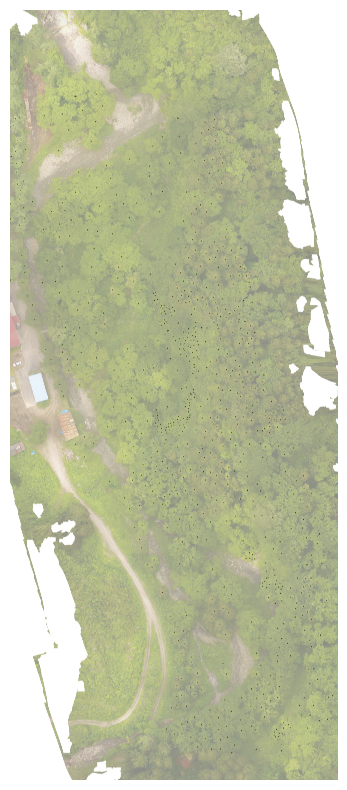

In [ ]:
# Read and visualize First treetopsImage
topsPath = os.path.join(dataFolder,"S1","S1treetopsROI.png")

# Read image using the opencv library
tops = readBM(topsPath)

# Show image with mathplolib
plt.rcParams["figure.figsize"] = (15,10)
plt.imshow(myImage)
plt.imshow(tops, cmap='gray', alpha=0.5)
plt.axis('off')
plt.show()

Let us also see a close up:

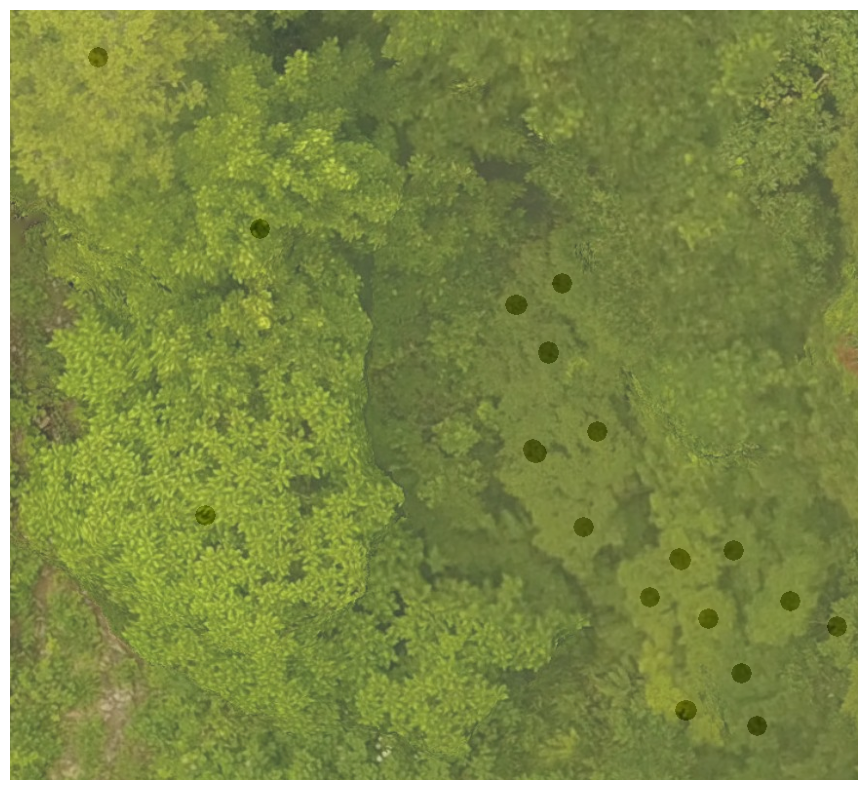

In [ ]:
# let's also show a subimage
xMin = 2500
xMax = 3370

yMin = 5660
yMax = 6450

subI = myImage[yMin:yMax,xMin:xMax]
subM = tops[yMin:yMax,xMin:xMax]

plt.rcParams["figure.figsize"] = (15,10)
plt.imshow(subI)
plt.imshow(subM, cmap='gray', alpha=0.2)
plt.axis('off')
plt.show()

The treetops mask can also be easily visualized.

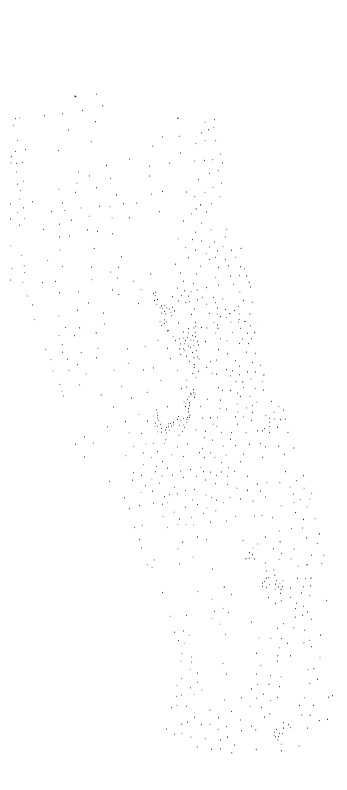

In [ ]:
# Show image with mathplolib
plt.rcParams["figure.figsize"] = (15,10)
plt.imshow(tops, cmap='gray')
plt.axis('off')
plt.show()

Now we can take advantage of this information to re-do the previous calculations based on the number of trees instead of the area.

## Task 8 Create Function to count trees.

Create a python function that:

- Receives the path to a treetop mask.  
- Uses the connectedcomponents with stats function to extract a list of the centroids of the treetops circles and returns it as a list.  

Then, create another function that receives a label image and a list of treetops and counts the number of treetops in every class. The output of this function will be a dictionary:  
- With the class codes as keys.
- With the number of trees in each class as values.  

In [ ]:
# Your solution


After we have these two functions, we can create a pandas dataframe as before, but now containg information on the number of trees:

## Task 9, Pandas DataFrame of trees per class

Create a python function that:

- For all the subfolders in the Data Folder:
    - Calls the function to create a label image.
    - Calls the function that counts the number of trees per calss and uses the result to create a dictionary.
- The format of the resulting dictionary is the following:
    - Keys: The names of the subfolders. For example "S1".
    - Values: Dictionaries with the following format:
        - Keys: The codes of every labes in the label image of the site.
        - Values: The number of trees associated to that label.

In [ ]:
# Your Solution


## Task 10

Build a Dataframe using the resulting dictionary, group the same species as before. Compute the percentage of trees of each species over all sites.  Plot the number of trees per site with a pie chart.

In [ ]:
# your solution